In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [6]:
train = pd.read_csv('data/train_c.csv')

In [7]:
test = pd.read_csv('data/test_c.csv')

## View of Training Set

In [8]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,37,23,20,0,3,27,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,37,21,22,4,3,31,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,24,24,38,2,3,30,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,24,21,38,5,3,30,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,24,23,38,5,3,14,3,13,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train.shape

(4209, 378)

In [10]:
test.shape

(4209, 377)

## View the target y

In [11]:
from ggplot import *

In [13]:
g = ggplot(train,aes(x='ID',y='y')) + geom_point()

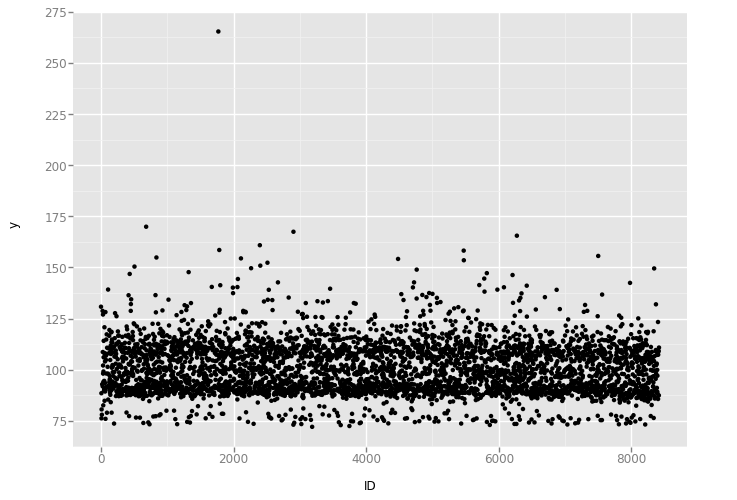

<ggplot: (8792698943720)>


In [14]:
print(g)

**Check the Normality of target**

In [16]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

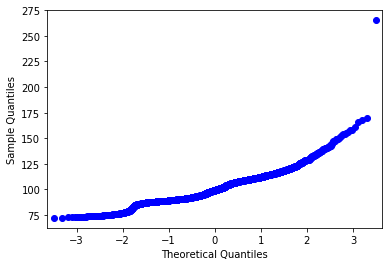

In [17]:
fig1 = sm.qqplot(train['y'])
plt.show(fig1)

if we remove the 'outlier'?

In [22]:
max_y = max(train.y)
print(max_y)

265.32


In [19]:
no_max = train[train['y']!=max_y]

In [21]:
no_max.shape

(4208, 378)

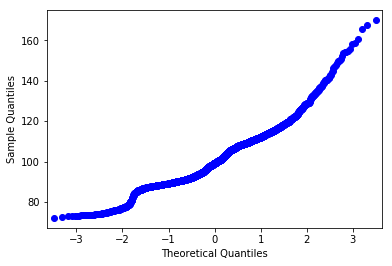

In [20]:
fig2 = sm.qqplot(no_max['y'])
plt.show(fig1)

**How about using log1p?**

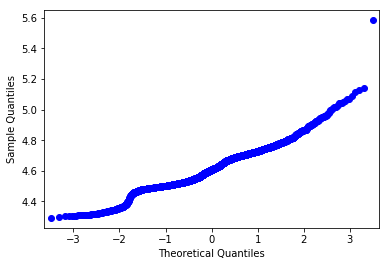

In [23]:
fig1 = sm.qqplot(np.log1p(train['y']))
plt.show(fig1)

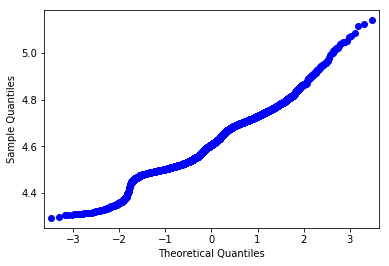

In [24]:
fig2 = sm.qqplot(np.log1p(no_max['y']))
plt.show(fig1)

Do not think there will be any difference

Check the variance of each features for both train and test data set.

## Calculate the proportion of 0 for each col

In [43]:
train_o = pd.read_csv('data/train.csv')
test_o = pd.read_csv('data/test.csv')

In [44]:
cat = []
for each in train_o.columns:
    if train_o[each].dtype == 'object':
        print(each)
        cat.append(each)

X0
X1
X2
X3
X4
X5
X6
X8


In [45]:
cat.append('ID')
cat.append('y')

In [46]:
con = [each for each in train_o.columns if each not in cat]

In [47]:
max_column = train_o[con].max().tolist()

In [48]:
max(max_column)

1

In [51]:
proportion_train = []
proportion_test = []
feature = []
for each in con:
    proportion_train.append(train_o[train_o[each]==0].shape[0]/train_o.shape[0])
    feature.append(each)
    proportion_test.append(test_o[test_o[each]==0].shape[0]/test_o.shape[0])

In [53]:
Proportion_table = pd.DataFrame({'feature':feature,'train':proportion_train,'test':proportion_test})

In [54]:
Proportion_table['diff'] = Proportion_table['train'] - Proportion_table['test']

In [56]:
Proportion_table.head()

,feature,test,train,diff
0,X10,0.980993,0.986695,0.005702
1,X11,0.999762,1.000000,0.000238
2,X12,0.925636,0.924923,-0.000713
3,X13,0.938940,0.942029,0.003089
4,X14,0.572107,0.571870,-0.000238


In [59]:
Proportion_table['index'] = Proportion_table.index.tolist()
diff_p = ggplot(Proportion_table,aes(x='index',y='diff')) + geom_point()

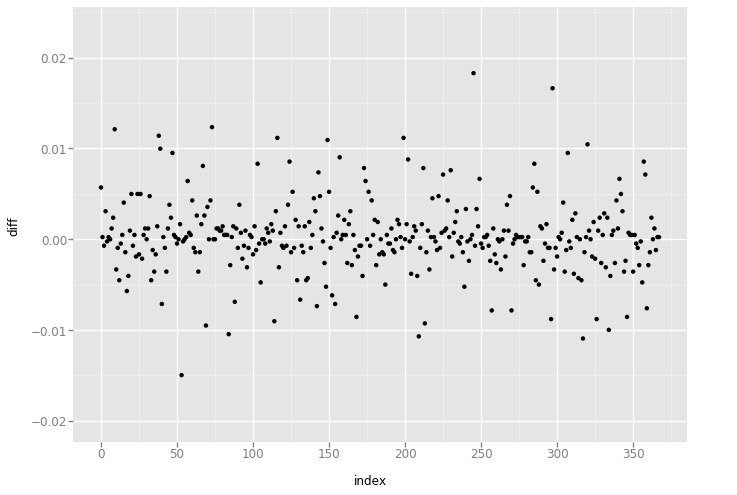

<ggplot: (-9223363244164071364)>


In [60]:
print(diff_p)

In [70]:
train_1 = Proportion_table[Proportion_table['train']==1]

In [71]:
test_1 = Proportion_table[Proportion_table['test']==1]

In [72]:
train_1

,feature,test,train,diff,index
1,X11,0.999762,1.0,0.000238,1
81,X93,0.999525,1.0,0.000475,81
95,X107,0.999050,1.0,0.000950,95
217,X233,0.999762,1.0,0.000238,217
219,X235,0.999762,1.0,0.000238,219
252,X268,0.999762,1.0,0.000238,252
273,X289,0.999525,1.0,0.000475,273
274,X290,0.999762,1.0,0.000238,274
277,X293,0.999762,1.0,0.000238,277
281,X297,0.999762,1.0,0.000238,281


In [73]:
test_1

,feature,test,train,diff,index
241,X257,1.0,0.999762,-0.000238,241
242,X258,1.0,0.997624,-0.002376,242
279,X295,1.0,0.999762,-0.000238,279
280,X296,1.0,0.999762,-0.000238,280
352,X369,1.0,0.999525,-0.000475,352


In [75]:
print(Proportion_table)

    feature      test     train      diff  index
0       X10  0.980993  0.986695  0.005702      0
1       X11  0.999762  1.000000  0.000238      1
2       X12  0.925636  0.924923 -0.000713      2
3       X13  0.938940  0.942029  0.003089      3
4       X14  0.572107  0.571870 -0.000238      4
5       X15  0.999287  0.999525  0.000238      5
6       X16  0.997387  0.997387  0.000000      6
7       X17  0.991209  0.992397  0.001188      7
8       X18  0.989784  0.992160  0.002376      8
9       X19  0.888335  0.900451  0.012117      9
10      X20  0.860537  0.857211 -0.003326     10
11      X21  0.998337  0.997387 -0.000950     11
12      X22  0.917558  0.913043 -0.004514     12
13      X23  0.979805  0.979330 -0.000475     13
14      X24  0.997624  0.998099  0.000475     14
15      X26  0.990972  0.995011  0.004039     15
16      X27  0.318841  0.317415 -0.001426     16
17      X28  0.973153  0.967451 -0.005702     17
18      X29  0.961036  0.956997 -0.004039     18
19      X30  0.99453

Single Feature is not informative enough. Need to create new features for information provision